# ADMN 5016 Machine Learning Project
ADMN 5016 Project  
Business Analytics  
School of Business  
St. Lawrence College  
Joseph Santarcangelo


## Field-Bounded Crop Type Classification
Crop type classification is an established application of satellite remote sensing, able to map continental scales of agriculture with a vast pool of satellite data and relatively few ground reference points required for a reasonably accurate product. Decision Trees and Support Vector Machines are commonly deployed as ML methods for the classifications.

Most 'classic' methods approach classification pixel-by-pixel. Smoothing and filtering windows may be applied *post-hoc* to map contiguous fields. While these methods are often satisfactory for large-area classifications, accuracy expectations typically top-out at 80-85%.

This project seeks to test an enhancement these methods by considering the crop field geometry prior to classification through feature engineering. Reflectance averages, vegetation indices, and aggregate measures of spread of pixel values are calculated for each field, and these values used to classify crop type for each of these discrete spatial features.

Decision-Tree and Support Vector Machine classifiers will be tested on this dataset and compared to benchmarks of pixel-by-pixel methods.

The CSV file included with this notebook contains LANDSAT 8 features extracted for each field. Three dominant crops (corn, soybeans, and winter wheat) are mapped to fields greater than 15 hectares (*n* = 928) in a small subset of West Perth County, Ontario. The satellite image is from 24 September 2013 when there is strong spectral discrimination between the crops of interest. Preprocessing and feature extraction from satellite imagery is resource-intensive and handled upstream of this CSV.

LANDSAT 8 data is retrieved from the United States Geological Survey (USGS) [EarthExplorer portal](https://earthexplorer.usgs.gov/). Field boundaries and crop data are retrieved from the author's previous work (*Bangs et al., 2014. Exploring Field-Bounded Remote Sensing and Agriculture: Spatial Discretization of Ontario Farmland. Poster. Presented to Canadian Association of Geographers Conference 2014)*.

## Business Case  

#### *We want to know how much of which crop is growing where. Why?*

Timely and accurate estimates of cropped areas can empower many business decisions downstream. Commodoties markets thrive on forecasts of seasonal yields across their catchments. Shipping logistics can be enhanced with a better understanding of volumes expected to move at harvest, and midstream terminals can better allocate product space with accurate forecasts. Crop insurance providers can benefit from a broader window into patterns of cropping decisions. A cropped area data product can be a powerful input to many forecasts and estimations across high-level agribusiness decisions.

Satellite remote sensing offers the ability to provide a cropped area data product over large areas and machine-learning techniques can enable the development of a product that can enter data pipelines in short order following collection. 

To provide an effective product, the data and techniques must:
* Provide highest accuracy at lowest cost
* Provide near real-time data and classification
* Support a simple, easy-to-integrate pipeline

The following project will present a test-of-concept using one single satellite image, with a novel approach of field boundaries used to develop features that may empower more classification ability with less input data. If this approach proves promising, the technique may be further developed towards a decision support data product meeting the requirements above.

## Data Pipeline

The two inputs for this technique are the satellite image as a GeoTIFF and the field boundaries as a polygon shapefile (ArcGIS .shp). For classification the field boundaries will require an attribute of crop type, for which a workable sample could be retrieved from a partner organization such as a Crop Insurance company. In this project, Corn, Soybean, and Winter Wheat - by far the dominant crops of the area - are considered for classification.

For this project, these data are brought into the R computing environment for processing with the package `raster`. Programming the `extract` function from this package allows aggregate field statistics to be retrieved for each cropped polygon in the shapefile. In this project, the median pixel reflectance value at each band of Landsat data, the median *NDVI* for each field, and the standard deviation, skewness, and kurtosis for each field are extracted. The data are stored in a data frame in R, and written to a CSV file to be imported for Python processing.

After the CSV file is loaded into the Python environment, `X` and `y` data are subset for each Machine Learning technique. Four combinations of inputs are considered for each technique:
* 7 bands of reflectance
* 5 bands of reflectance + NDVI
* 5 bands of reflectance + NDVI + NDVI Skewness
* NDVI + NDVI Skewness

Each of these combinations are subject to a 1/3:2/3 test:train split. Three Machine Learning techniques are tested on these data:
* Decision Trees with Bagging and Random Forest
* Support Vector Machine (SVM)
* *k*-Nearest Neighbours

Following each technique's prediction on the 1/3 test data, an accuracy measure and confusion matrix is retrieved and compared.

## Results
Overall, the Decision Tree technique, particularly when employed with Random Forest, provided the most accurate classification at `0.871`.

The SVM and *k*-NN methods could not achieve better than `0.800` accuracies.

As well, providing each technique with just the reflectance data (*i.e.* 7 Bands) proved to offer the most accurate classification. The NDVI and NDVI Skewness did not improve and actually detracted from the models. The NDVI and Skewness alone offered the worst-performing models.

The following accuracy table and confusion matrices explore the best classification of each technique.

All methods performed performed reasonably wqell identifying Winter Wheat and Corn, with more confusion in Soybeans. Overall, the Random Forest model performed very well discriminating Corn, and had the least confusion in Soybeans, at the expense of less accurate discrimination of Winter Wheat.

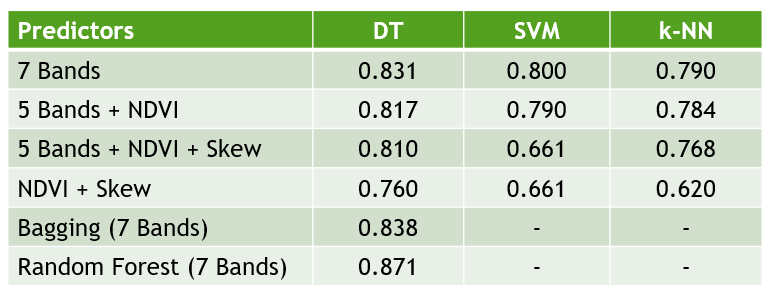

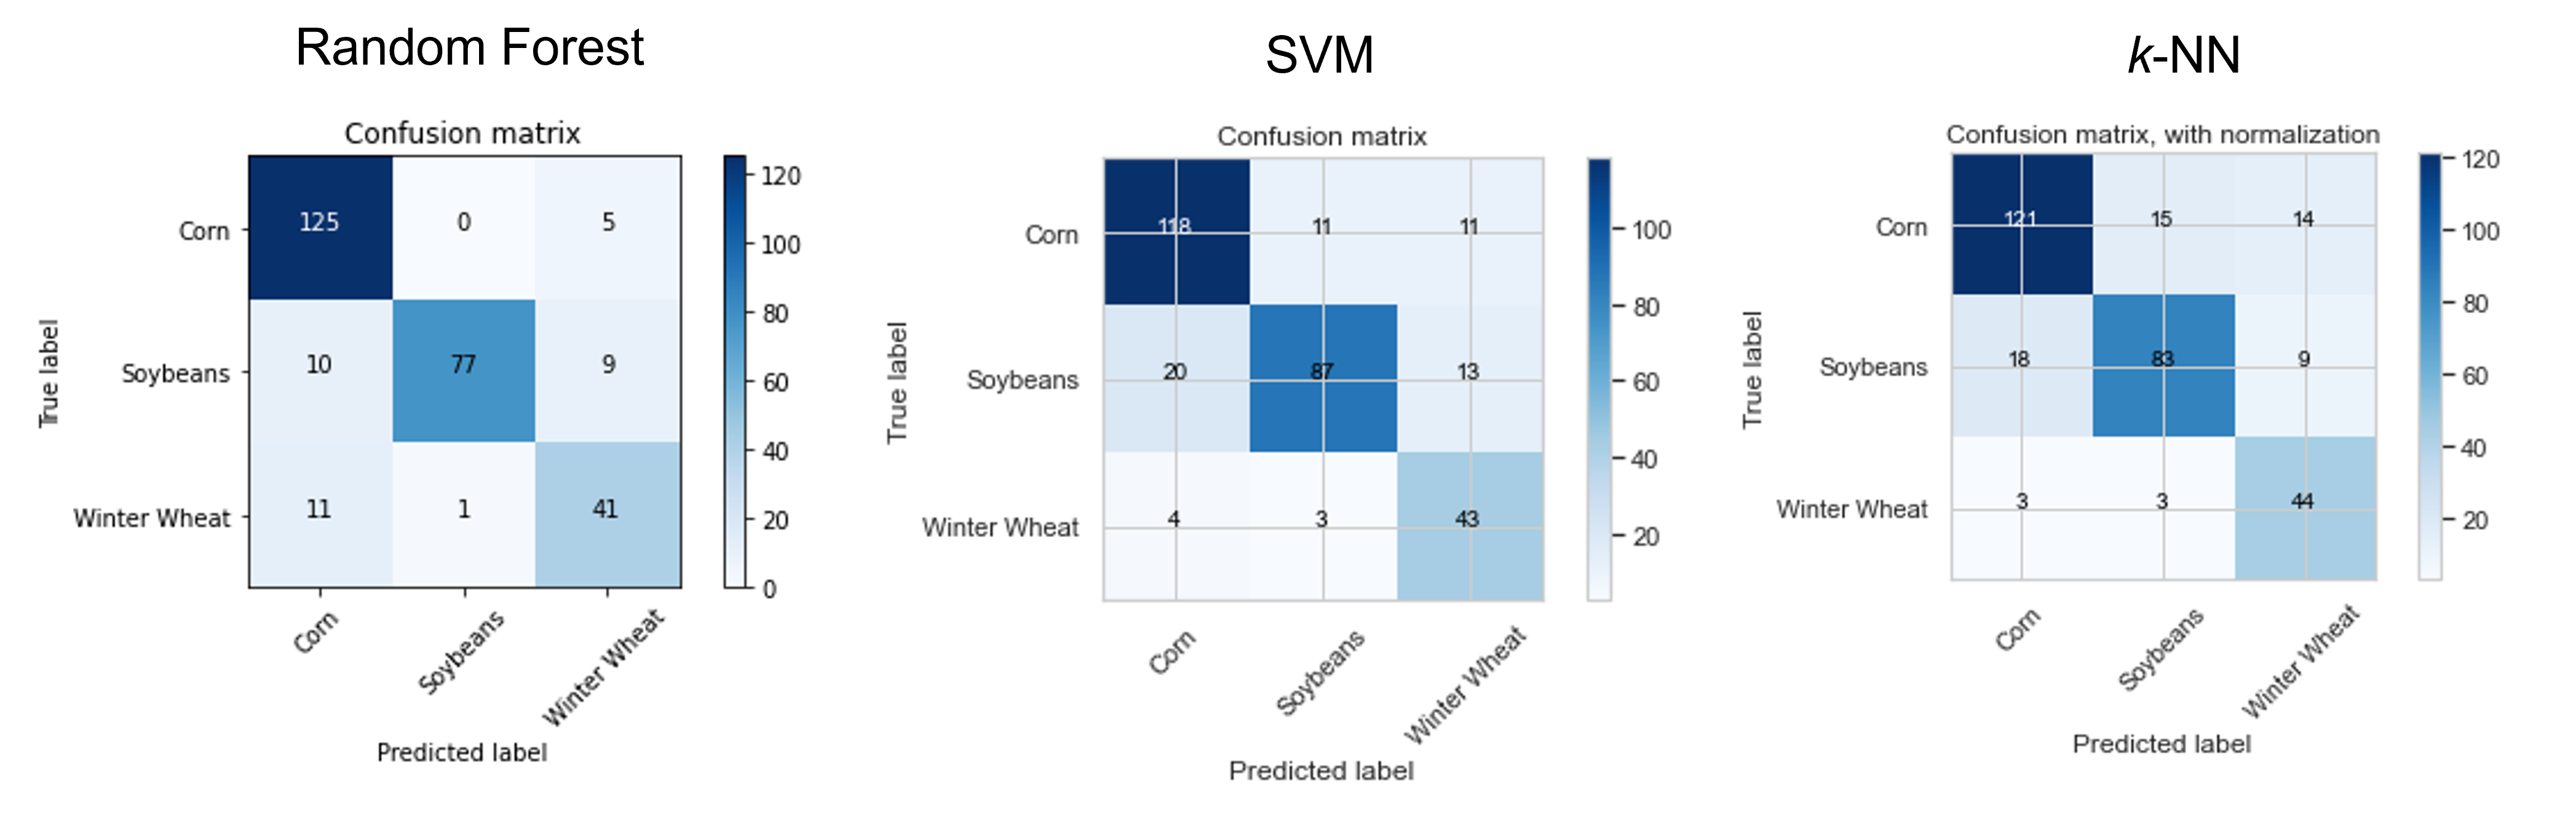

## Discussion